# Imports and inits

In [1]:
import os
import numpy as np
import pandas as pd
import sqlite3
import json
import csv
from google.colab import drive
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')

drive.mount('/content/gdrive/', force_remount=True)
os.chdir("/content/gdrive/Shareddrives/ECS 260/final")

Mounted at /content/gdrive/


In [2]:
# getting columns to correlate
with open('columns_to_correlate.txt', "r") as file:
  columns_to_correlate = file.read()
columns_to_correlate = json.loads(columns_to_correlate)
n_cols = len(columns_to_correlate)
print(f"{n_cols} columns to correlate\n{columns_to_correlate}")

25 columns to correlate
['rank', 'dependants_count', 'dependant_repos_count', 'forks', 'stars', 'watchers', 'issues', 'pr', 'contributors', 'no_of_commits', 'no_of_dependencies', 'lagging_dependencies_count', 'unpack_size', 'file_count', 'has_repository', 'avg_commit_freq', 'total_lines_of_code', 'sloc', 'no_of_files', 'health_score', 'security_numeric', 'popularity_numeric', 'maintenance_numeric', 'community_numeric', 'days_since_last_modification']


In [3]:
def get_df(query):
  conn = sqlite3.connect("final_database.db")
  cursor = conn.cursor()
  df = pd.read_sql_query(query, conn)
  conn.close()
  return df

# Correlation analysis

In [4]:
# pearson
p_corr_mat = [['Column Name' if i == 0 else columns_to_correlate[i - 1] for i in range(n_cols + 1)] if j == 0 else [columns_to_correlate[j - 1] if i == 0 else '-' for i in range(n_cols + 1)] for j in range(n_cols + 1)]
# p_corr_mat_clr = [['Column Name' if i == 0 else columns_to_correlate[i - 1] for i in range(n_cols + 1)] if j == 0 else [columns_to_correlate[j - 1] if i == 0 else '-' for i in range(n_cols + 1)] for j in range(n_cols + 1)]
# getting data of a pair of column
for i in range(n_cols):
  for j in range(n_cols):
    if i >= j:
      continue
    col_1 = columns_to_correlate[i]
    col_2 = columns_to_correlate[j]
    # print(f"Now checking {col_1}, {col_2}")
    df = get_df(f"SELECT {col_1}, {col_2} FROM package_metrics WHERE {col_1} IS NOT NULL AND {col_2} IS NOT NULL").astype(float)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # p_corr_mat_clr[i + 1][j + 1] = len(df)/30000

    if len(df) == 0:
      p_corr_mat[i + 1][j + 1] = 0
      continue

    col_1_vals = df[col_1]
    col_2_vals = df[col_2]

    # calculate Pearson correlation coefficient
    pearson_corr, _ = pearsonr(col_1_vals, col_2_vals)
    p_corr_mat[i + 1][j + 1] = pearson_corr

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coeffic

In [5]:
# spearman
s_corr_mat = [['Column Name' if i == 0 else columns_to_correlate[i - 1] for i in range(n_cols + 1)] if j == 0 else [columns_to_correlate[j - 1] if i == 0 else '-' for i in range(n_cols + 1)] for j in range(n_cols + 1)]
# s_corr_mat_clr = [['Column Name' if i == 0 else columns_to_correlate[i - 1] for i in range(n_cols + 1)] if j == 0 else [columns_to_correlate[j - 1] if i == 0 else '-' for i in range(n_cols + 1)] for j in range(n_cols + 1)]
# getting data of a pair of column
for i in range(n_cols):
  for j in range(n_cols):
    if i >= j:
      continue
    col_1 = columns_to_correlate[i]
    col_2 = columns_to_correlate[j]
    # print(f"Now checking {col_1}, {col_2}")
    df = get_df(f"SELECT {col_1}, {col_2} FROM package_metrics WHERE {col_1} IS NOT NULL AND {col_2} IS NOT NULL").astype(float)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # s_corr_mat_clr[i + 1][j + 1] = len(df)/30000

    if len(df) == 0:
      s_corr_mat[i + 1][j + 1] = 0
      continue

    col_1_vals = df[col_1]
    col_2_vals = df[col_2]

    # calculate Pearson correlation coefficient
    spearman_corr, _ = spearmanr(col_1_vals, col_2_vals)
    s_corr_mat[i + 1][j + 1] = spearman_corr

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the

In [60]:
def visualize_matrix(cols, corr_mat, corr_mat_clr = None, small = False, tilt = False):
  corr_mat = corr_mat[1:]
  corr_mat = [corr[1:] for corr in corr_mat]

  # corr_mat_clr = corr_mat_clr[1:]
  # corr_mat_clr = [corr[1:] for corr in corr_mat_clr]
  corr_mat = np.array(corr_mat)
  corr_mat[corr_mat == '-'] = np.nan

  corr_mat = corr_mat.astype(float)

  # corr_mat_clr = np.array(corr_mat_clr)
  # corr_mat_clr[corr_mat_clr == '-'] = np.nan

  # corr_mat_clr = corr_mat_clr.astype(float)

  # corr_mat_clr_np = np.array(corr_mat_clr)

  # Create a figure and axes
  if small:
    fig, ax = plt.subplots(figsize=(5, 4))
  else:
    fig, ax = plt.subplots(figsize=(15, 12))

  # Create heatmap with background color from corr_mat_clr
  heatmap = ax.imshow(corr_mat, cmap='coolwarm')

  ax.set_xticks(np.arange(len(cols) - 1) + 0.5, minor=True)
  ax.set_yticks(np.arange(len(cols) - 1) + 0.5, minor=True)
  ax.grid(which='minor', color='black', linestyle='--', alpha=0.2)

  # Overlay the background color based on corr_mat_clr
  for i in range(n_cols):
    for j in range(n_cols):
      if i >= j:
        continue
      if not np.isnan(corr_mat[i][j]):
        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color=plt.cm.coolwarm(corr_mat[i][j])))
        ax.text(j, i, f'{corr_mat[i][j]:.2f}', ha="center", va="center", color="black")

  # Set column and row labels
  ax.set_xticks(np.arange(len(cols)))
  ax.set_yticks(np.arange(len(cols)))
  if tilt:
    ax.set_xticklabels(cols, rotation=45)
  else:
    ax.set_xticklabels(cols, rotation=90)
  ax.set_yticklabels(cols)

  # Add color bar
  cbar = fig.colorbar(heatmap)
  cbar.set_label('Correlation')
  # Show plot
  plt.show()

Pearson correlation: 


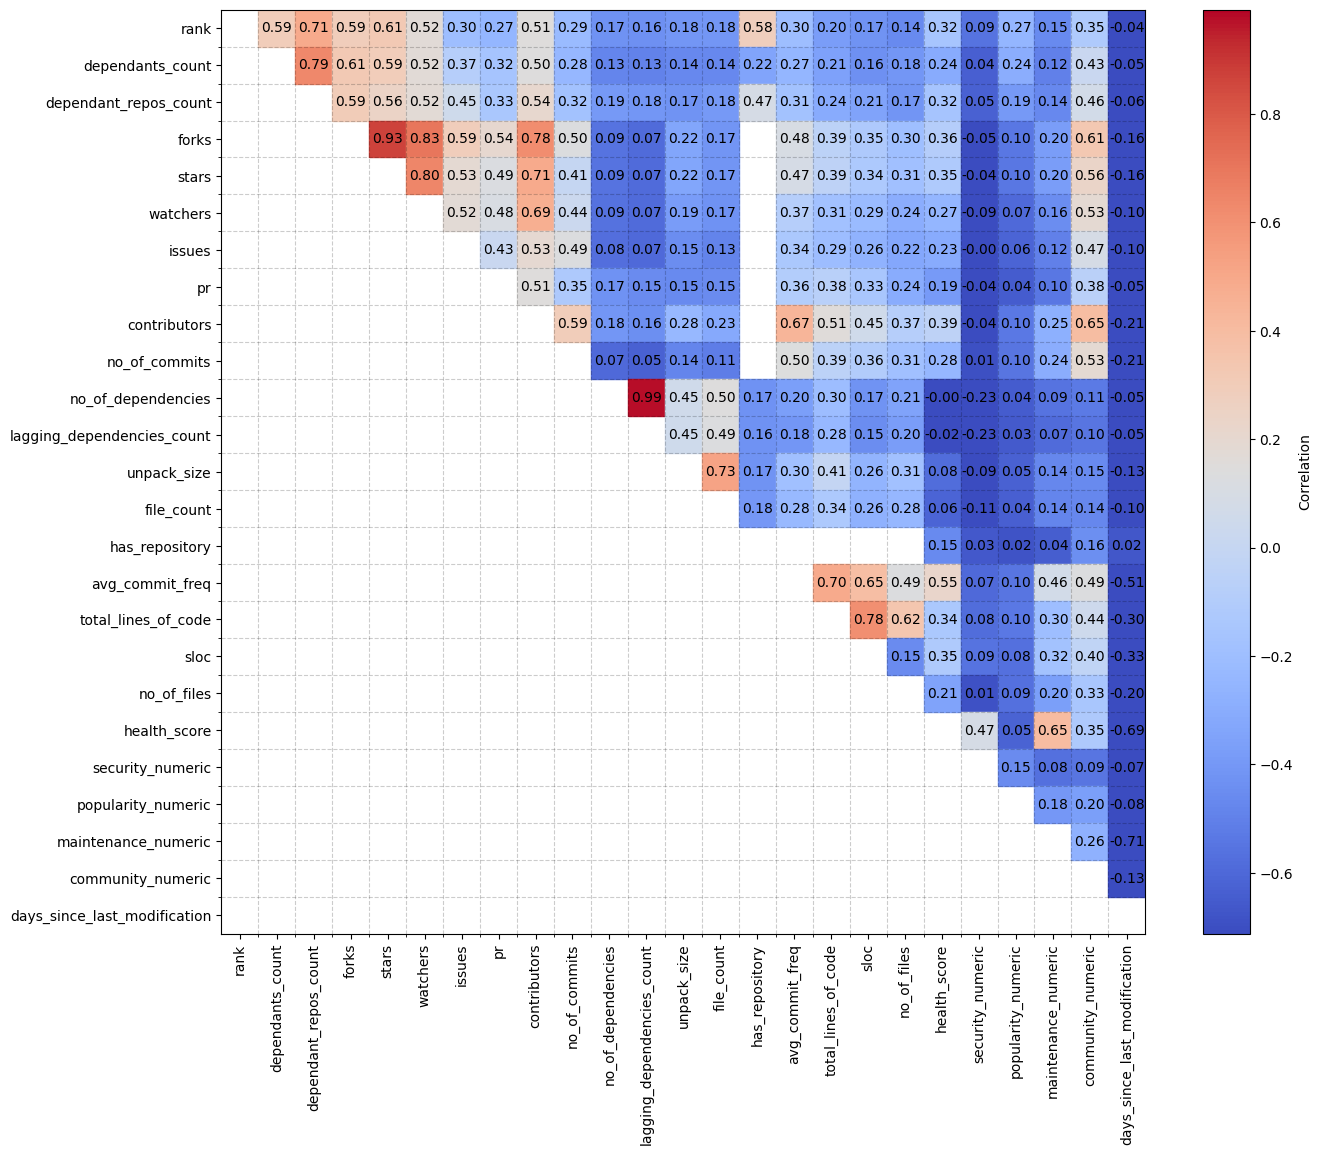

In [44]:
print("Pearson correlation: ")
visualize_matrix(columns_to_correlate, p_corr_mat)

Spearman correlation: 


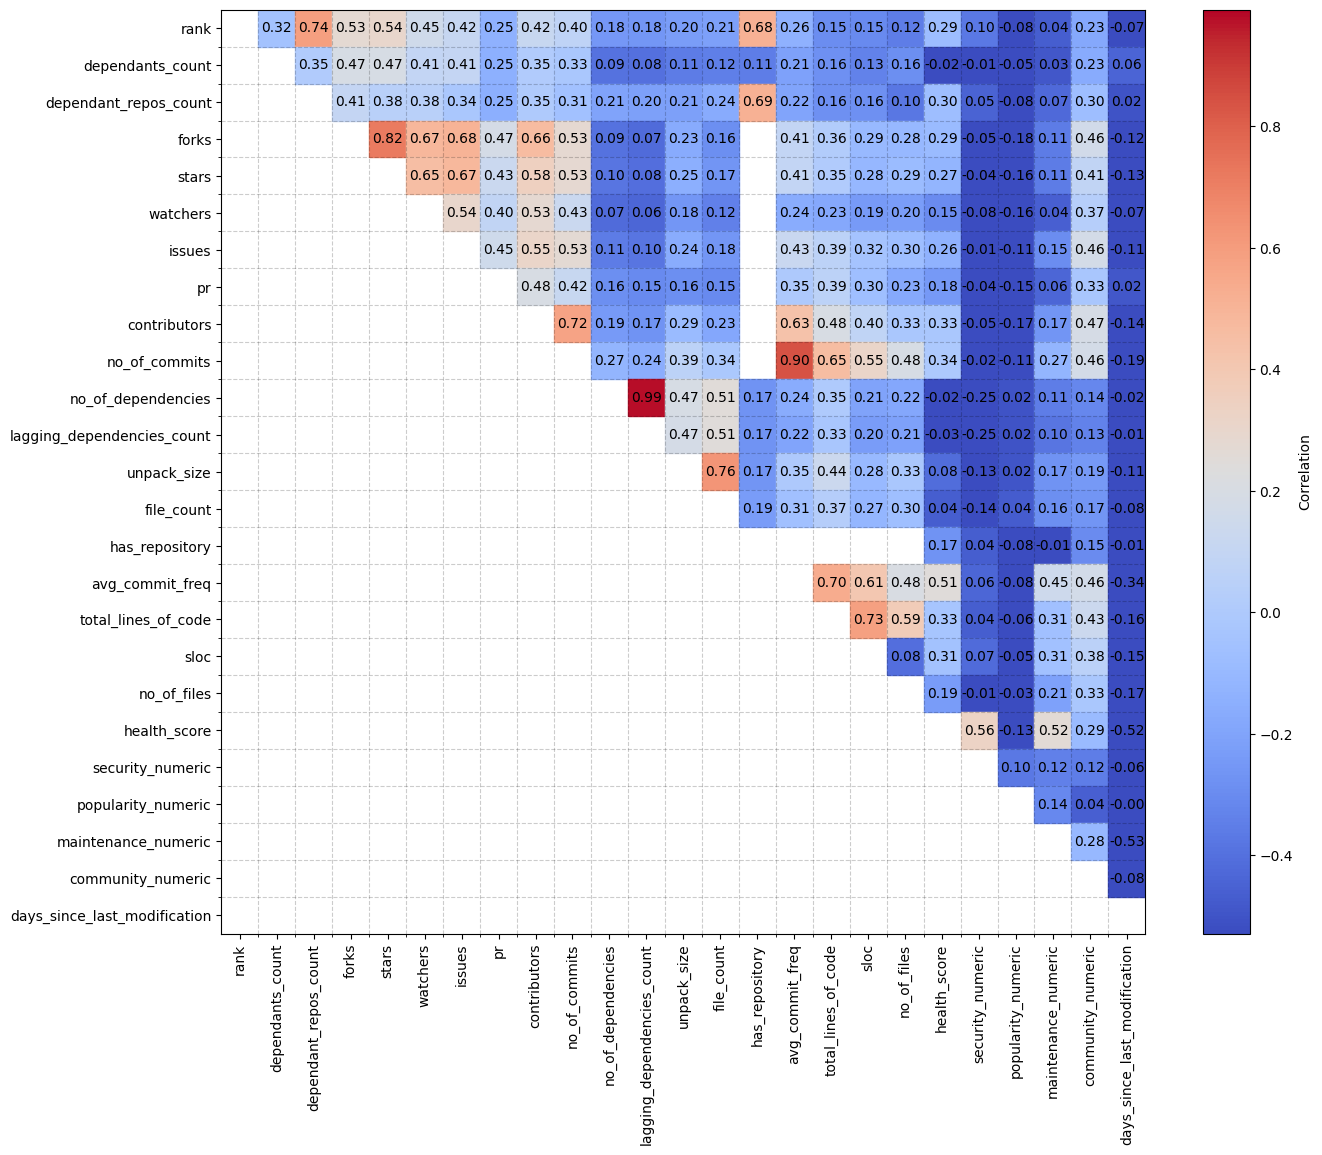

In [45]:
print("Spearman correlation: ")
visualize_matrix(columns_to_correlate, s_corr_mat)

In [46]:
p_high_corr_pairs = []
n_cols = len(p_corr_mat) - 1
for i in range(1, n_cols + 1):
    for j in range(i + 1, n_cols + 1):
        corr_value = p_corr_mat[i][j]
        if isinstance(corr_value, float) and abs(corr_value) >= 0.78:
            p_high_corr_pairs.append((p_corr_mat[i][0], p_corr_mat[0][j], corr_value))
print("Pearson: ")
for pair in p_high_corr_pairs:
    print(f"({pair[0]}, {pair[1]}) have correlation {pair[2]}")


Pearson: 
(dependants_count, dependant_repos_count) have correlation 0.78908688585464
(forks, stars) have correlation 0.9284049337972052
(forks, watchers) have correlation 0.8316343055061667
(stars, watchers) have correlation 0.795082985758907
(no_of_dependencies, lagging_dependencies_count) have correlation 0.9920657622331146


In [47]:
s_high_corr_pairs = []
n_cols = len(s_corr_mat) - 1
for i in range(1, n_cols + 1):
    for j in range(i + 1, n_cols + 1):
        corr_value = s_corr_mat[i][j]
        if isinstance(corr_value, float) and abs(corr_value) >= 0.78:
            s_high_corr_pairs.append((s_corr_mat[i][0], s_corr_mat[0][j], corr_value))
print("Spearman: ")
for pair in s_high_corr_pairs:
    print(f"({pair[0]}, {pair[1]}) have correlation {pair[2]}")


Spearman: 
(forks, stars) have correlation 0.8201452241210067
(no_of_commits, avg_commit_freq) have correlation 0.8994694988341979
(no_of_dependencies, lagging_dependencies_count) have correlation 0.9917052147598523


In [56]:
# getting columns with high correlation
with open('columns_with_high_correlation.txt', "r") as file:
  columns_with_high_correlation = file.read()
columns_with_high_correlation = json.loads(columns_with_high_correlation)
n_cols = len(columns_with_high_correlation)
print(f"{n_cols} columns found to be highly correlated:\n{columns_with_high_correlation}")

7 columns found to be highly correlated:
['forks', 'stars', 'watchers', 'dependants_count', 'no_of_dependencies', 'dependant_repos_count', 'lagging_dependencies_count']


In [57]:
# pearson
p_corr_mat = [['Column Name' if i == 0 else columns_with_high_correlation[i - 1] for i in range(n_cols + 1)] if j == 0 else [columns_with_high_correlation[j - 1] if i == 0 else '-' for i in range(n_cols + 1)] for j in range(n_cols + 1)]
# p_corr_mat_clr = [['Column Name' if i == 0 else columns_eliminated[i - 1] for i in range(n_cols + 1)] if j == 0 else [columns_eliminated[j - 1] if i == 0 else '-' for i in range(n_cols + 1)] for j in range(n_cols + 1)]
# getting data of a pair of column
for i in range(n_cols):
  for j in range(n_cols):
    if i >= j:
      continue
    col_1 = columns_with_high_correlation[i]
    col_2 = columns_with_high_correlation[j]
    # print(f"Now checking {col_1}, {col_2}")
    df = get_df(f"SELECT {col_1}, {col_2} FROM package_metrics WHERE {col_1} IS NOT NULL AND {col_2} IS NOT NULL").astype(float)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # p_corr_mat_clr[i + 1][j + 1] = len(df)/30000

    if len(df) == 0:
      p_corr_mat[i + 1][j + 1] = 0
      continue

    col_1_vals = df[col_1]
    col_2_vals = df[col_2]

    # calculate Pearson correlation coefficient
    pearson_corr, _ = pearsonr(col_1_vals, col_2_vals)
    p_corr_mat[i + 1][j + 1] = pearson_corr

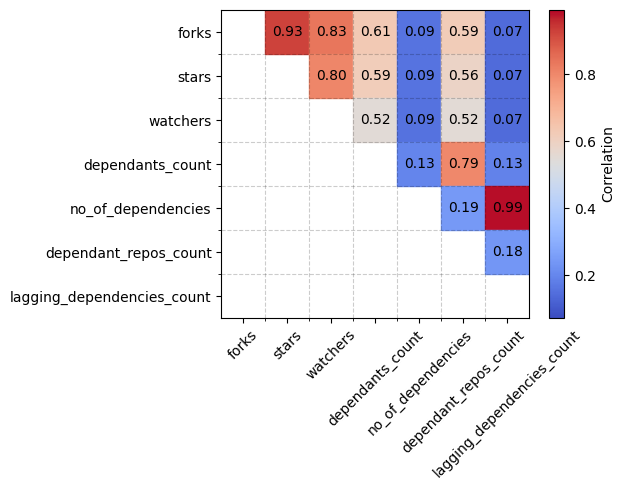

In [58]:
visualize_matrix(columns_with_high_correlation, p_corr_mat, small = True, tilt = True)

In [59]:
# write into a csv
with open('correlation_matrix.csv', 'w', newline='') as csvfile:
  csv_writer = csv.writer(csvfile)
  csv_writer.writerows(p_corr_mat)

# check csv
print(pd.read_csv('correlation_matrix.csv'))

                  Column Name forks               stars            watchers  \
0                       forks     -  0.9284049337972052  0.8316343055061667   
1                       stars     -                   -   0.795082985758907   
2                    watchers     -                   -                   -   
3            dependants_count     -                   -                   -   
4          no_of_dependencies     -                   -                   -   
5       dependant_repos_count     -                   -                   -   
6  lagging_dependencies_count     -                   -                   -   

     dependants_count   no_of_dependencies dependant_repos_count  \
0  0.6075723434323534  0.09089350634976247    0.5946588618392601   
1  0.5933779978197817  0.09117983584333633    0.5597846098612927   
2  0.5183177085595054  0.08734715042144162    0.5220921393168072   
3                   -   0.1339635447337055      0.78908688585464   
4                   -      